In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [2]:
seeds = np.linspace(201, 10000, 10000 - 200)
Energy = []
iterations = []

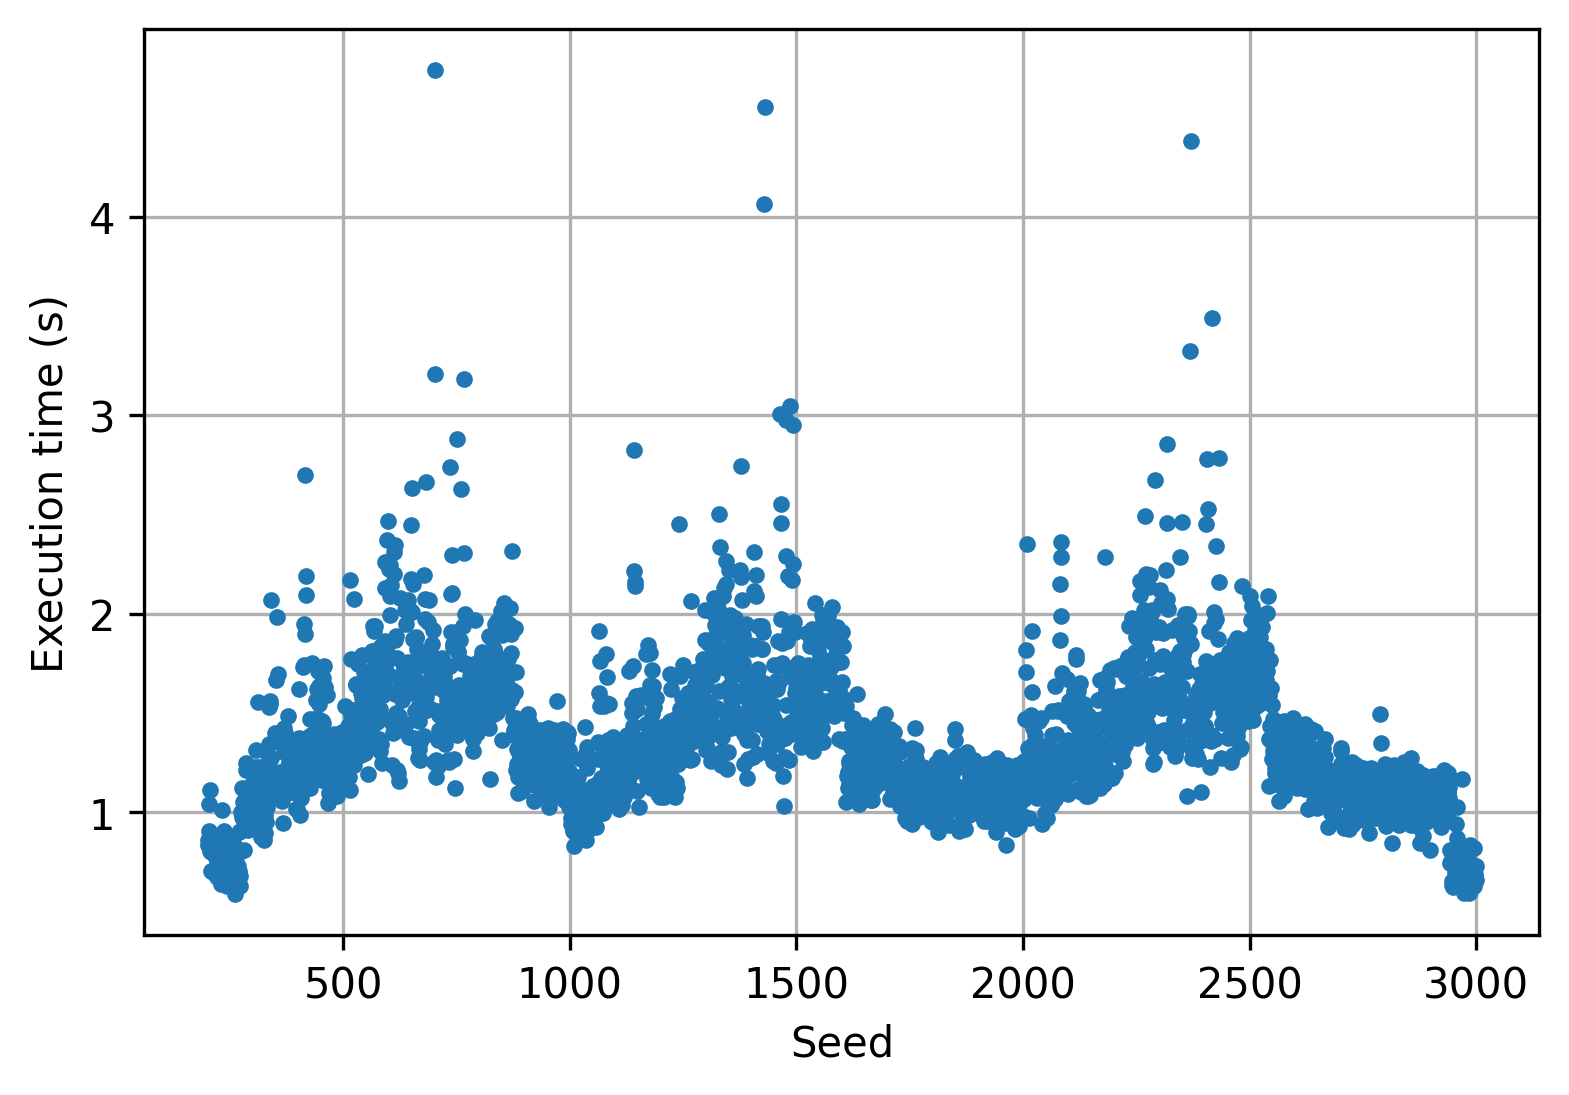

In [3]:
# Apple M1
# Cobyla(maxiter = 400)
seeds_M1 = np.linspace(201, 3000, 3000 - 200)
execution_time_M1 = []
for i in np.arange(1, 4):
    df = pd.read_excel('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/Seed Generator/Cobyla Depth = 1/Cobyla, fixed output/Apple M1/static seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time_M1 += df['time (s)'].tolist()

# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds_M1, execution_time_M1, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

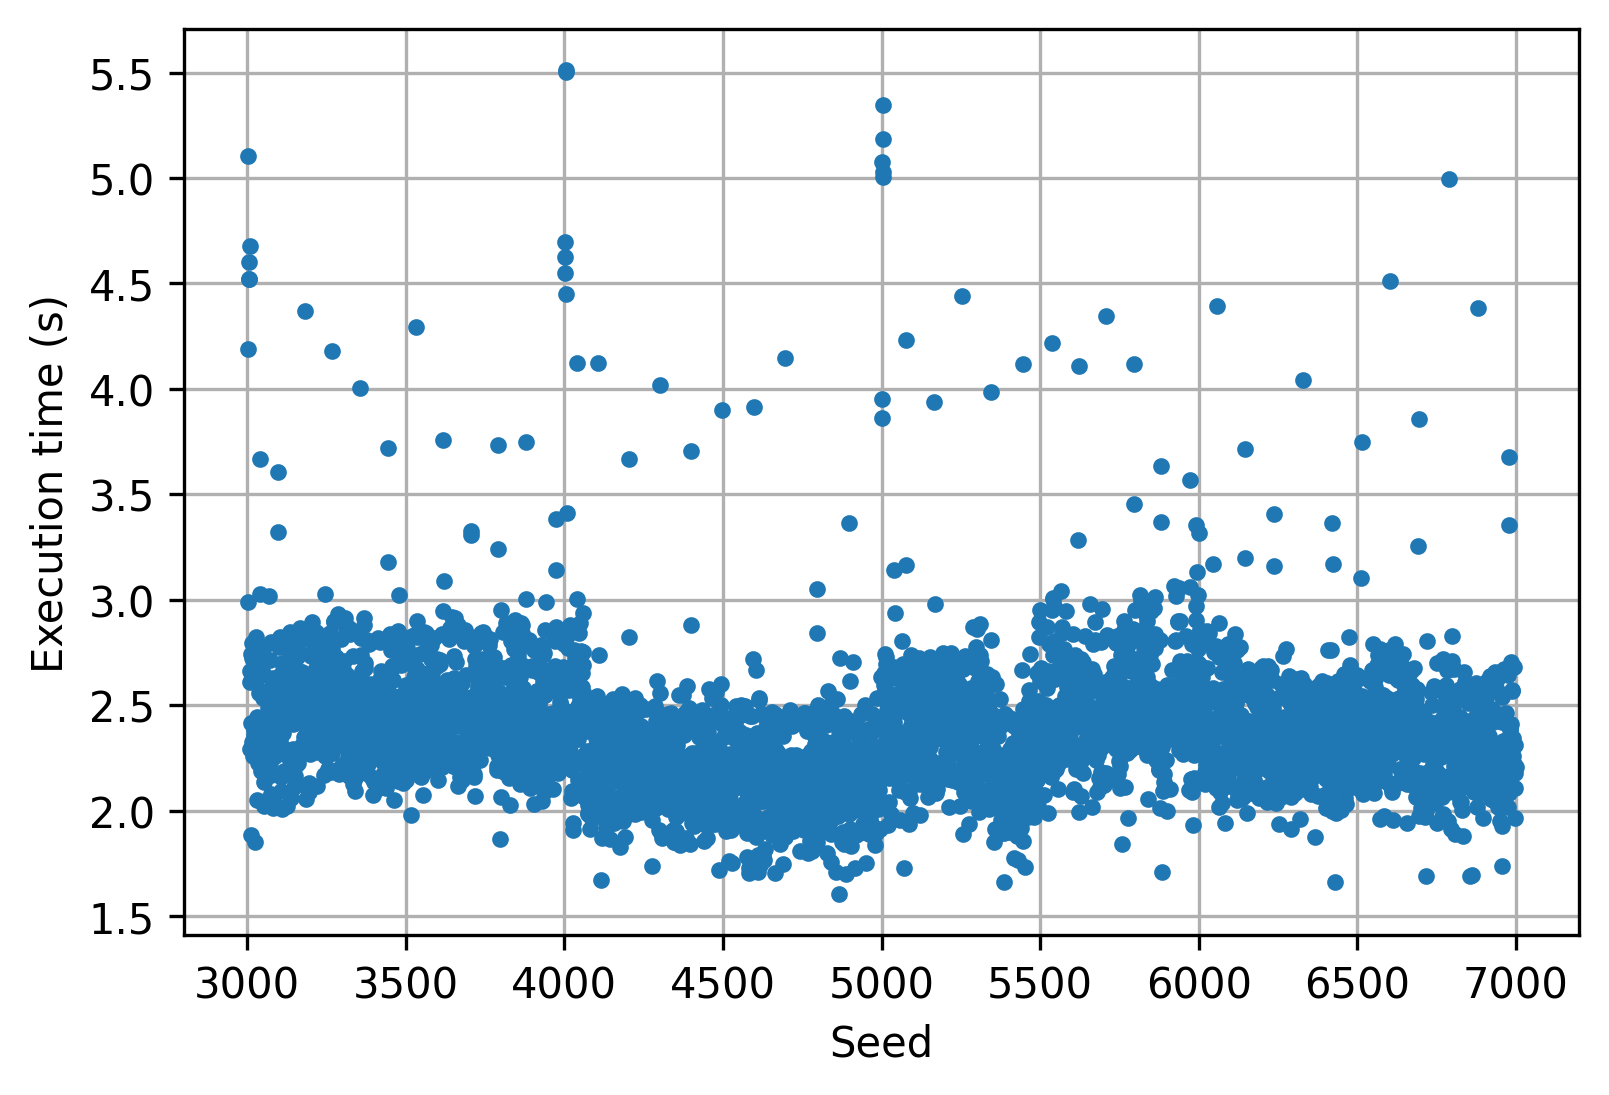

In [4]:
# Colab
# Cobyla(maxiter = 400)
seeds_colab = np.linspace(3001, 7000, 7000 - 3000)
execution_time_colab = []
for i in np.arange(4, 8):
    df = pd.read_excel('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/Seed Generator/Cobyla Depth = 1/Cobyla, fixed output/Google Cobyla/static seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time_colab += df['time (s)'].tolist()

# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds_colab, execution_time_colab, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

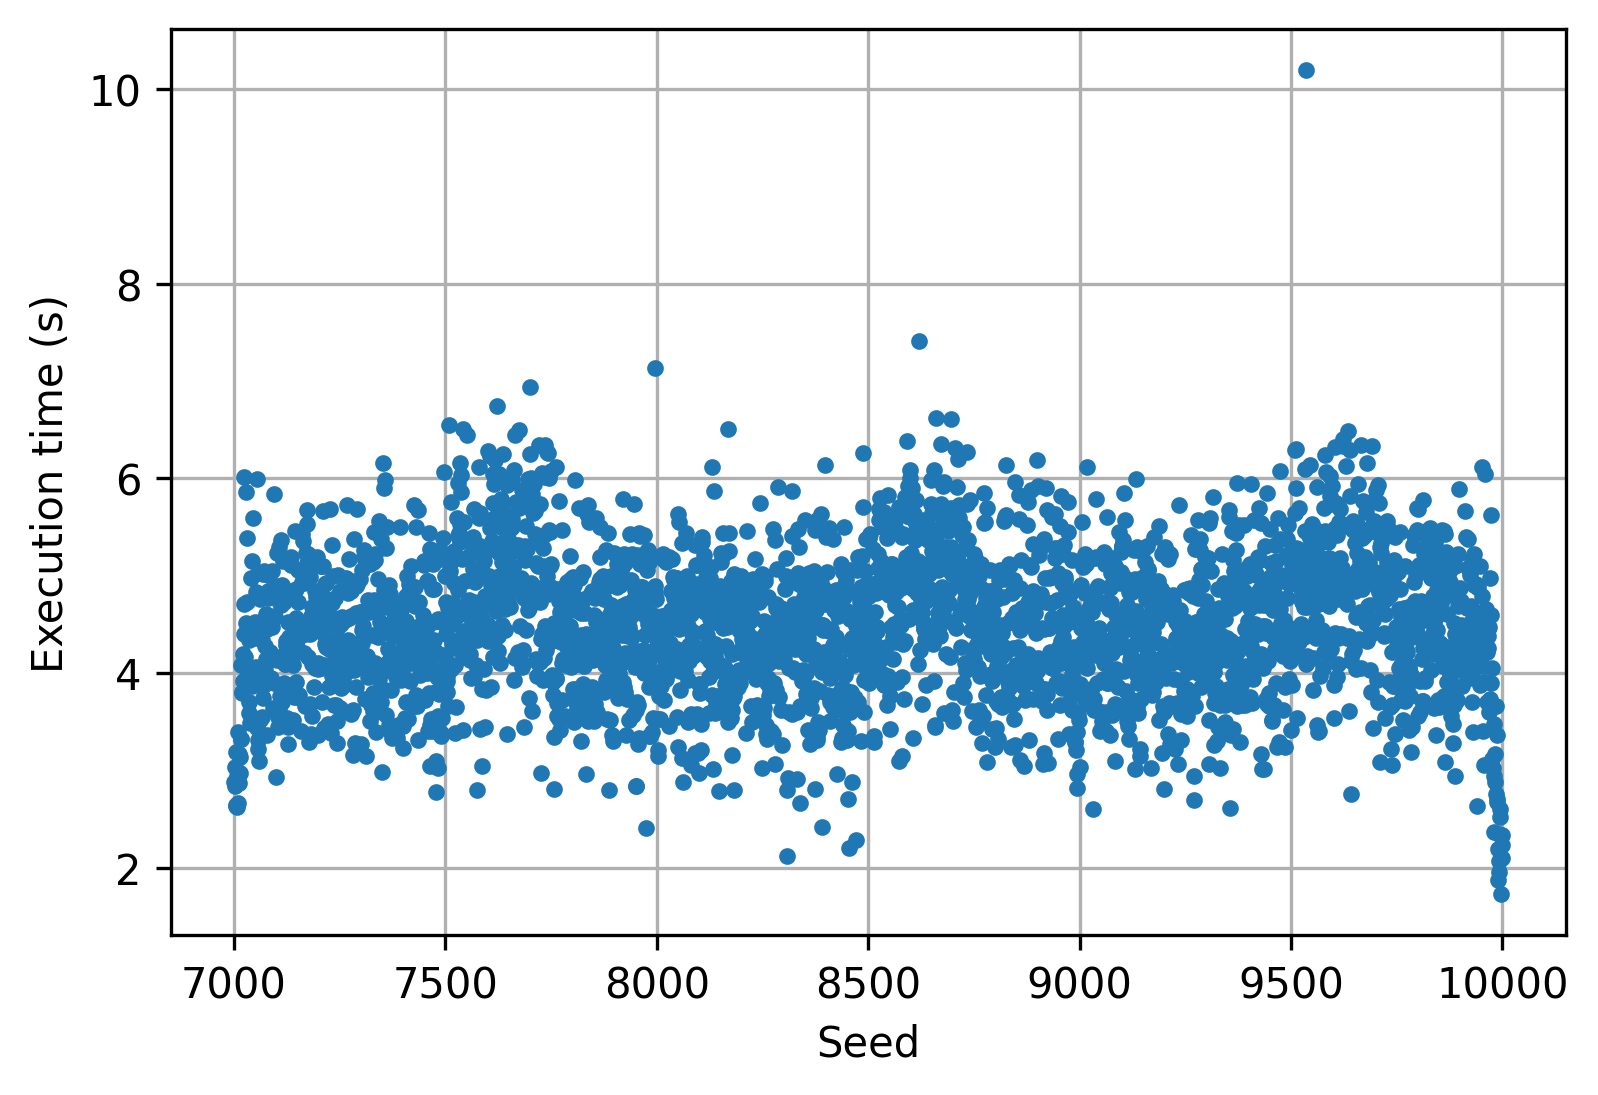

In [5]:
# IBM quantum lab
# Cobyla(maxiter = 400)
seeds_ibm = np.linspace(7001, 10000, 10000 - 7000)
execution_time_ibm = []
for i in np.arange(8, 11):
    df = pd.read_excel('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/Seed Generator/Cobyla Depth = 1/Cobyla, fixed output/IBM Quantum Lab/static seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time_ibm += df['time (s)'].tolist()

# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds_ibm, execution_time_ibm, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

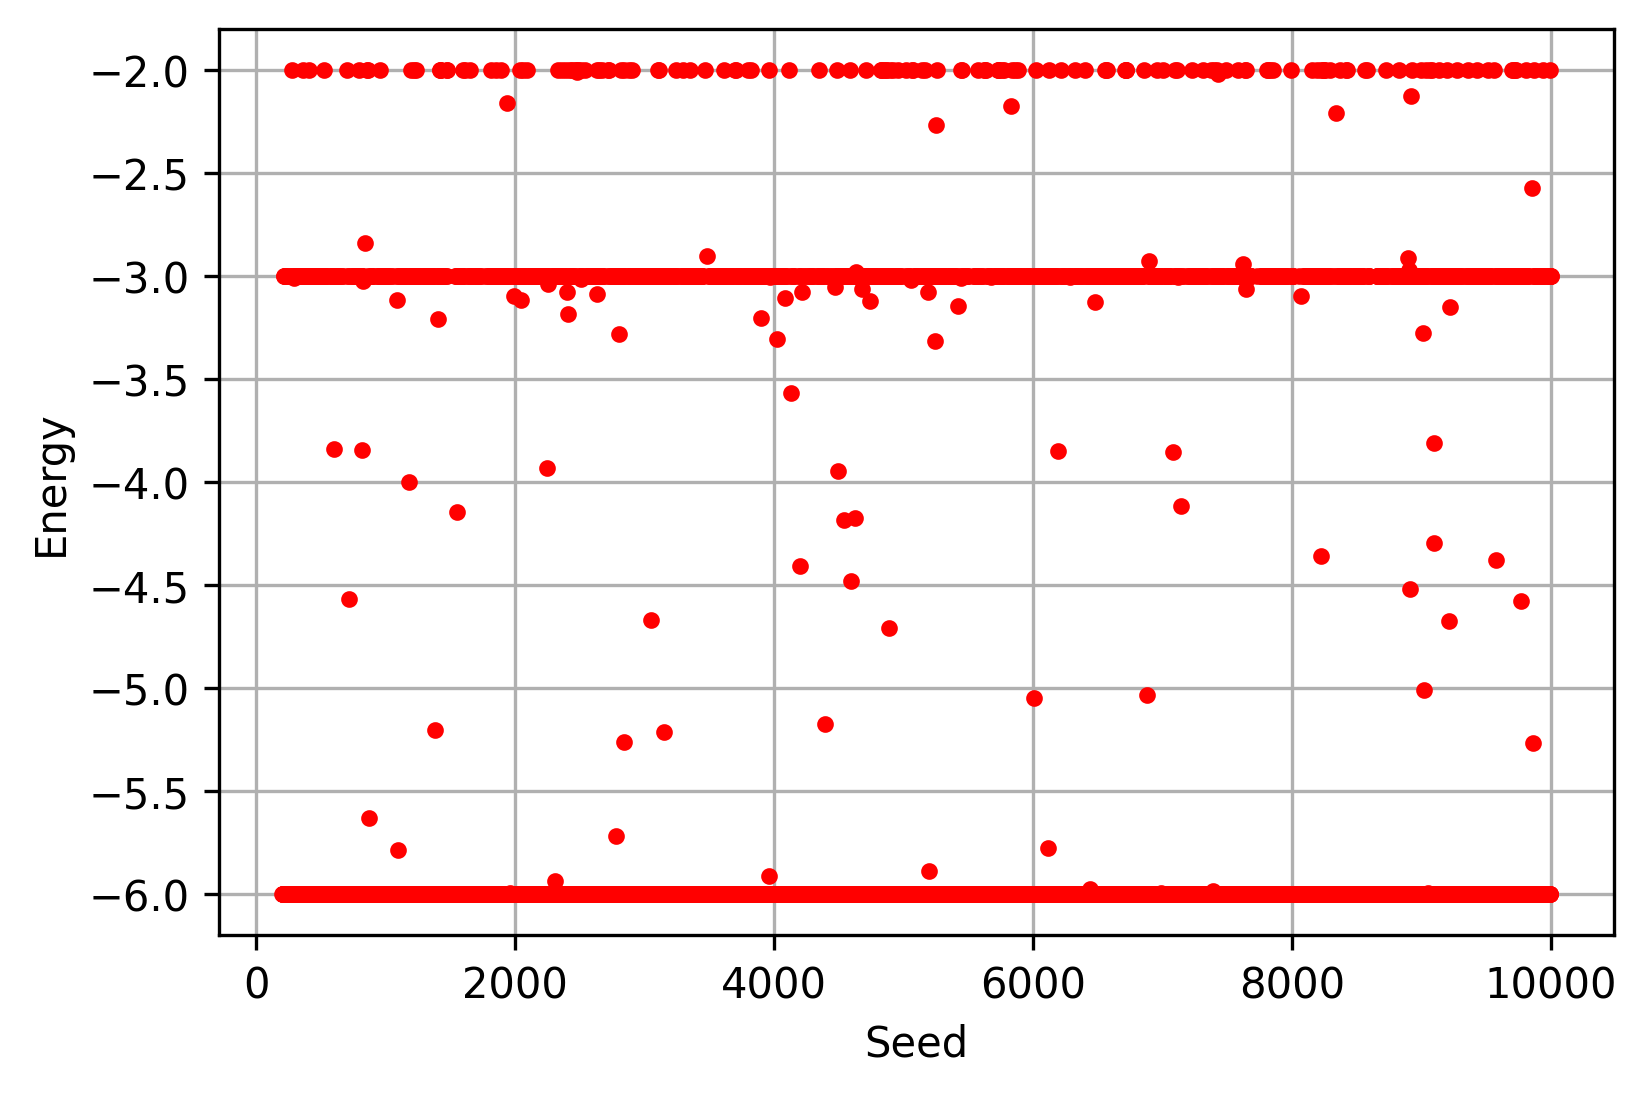

In [6]:
# seed vs energy:
# Cobyla(maxiter = 400)
plt.figure(dpi = 300)
plt.plot(seeds, Energy, 'r.')
plt.xlabel('Seed')
plt.ylabel('Energy')
plt.grid()
plt.show()

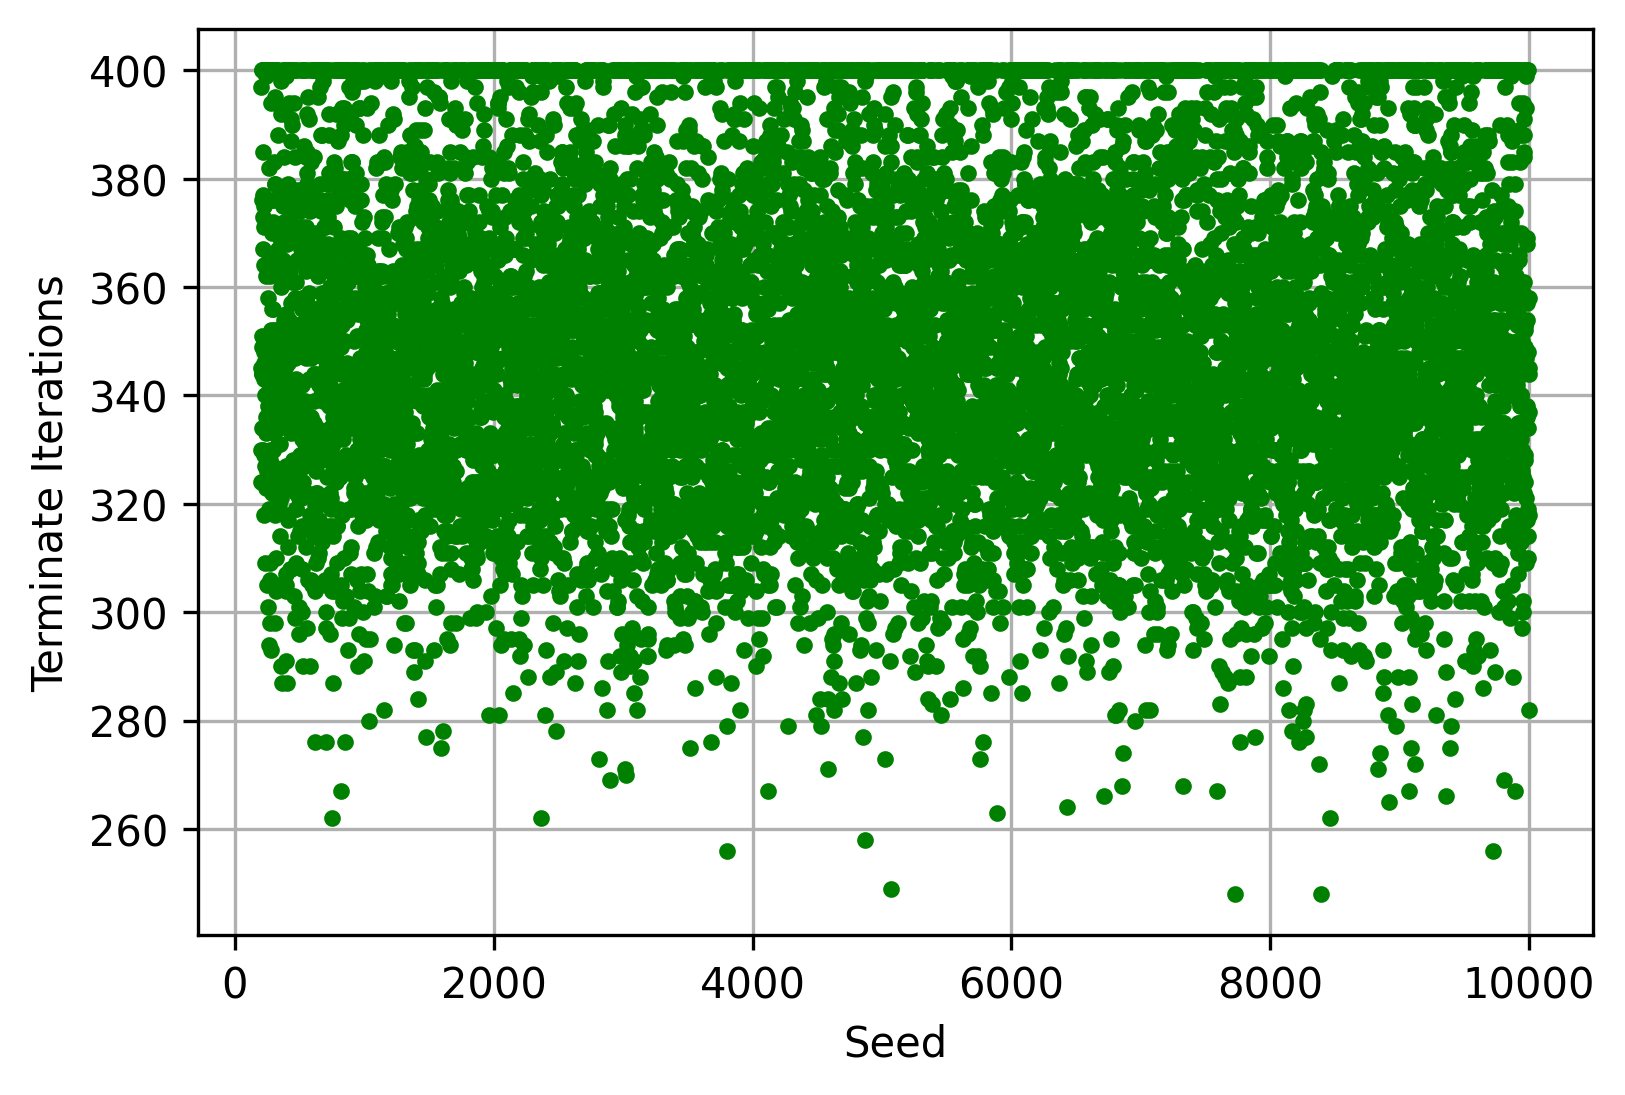

In [7]:
# seed vs iteration:
# Cobyla(maxiter = 400)
plt.figure(dpi = 300)
plt.plot(seeds, iterations, 'g.')
plt.xlabel('Seed')
plt.ylabel('Terminate Iterations')
plt.grid()
plt.show()

In [17]:
e = np.array(Energy)
two = np.where(e >= -2)
ratio2 = len(two[0]) / len(e)
ratio2 * 100

1.5510204081632653

In [18]:
three = np.where(e >= -3)
ratio3 = (len(three[0]) - len(two[0]))/len(e)
ratio3 * 100

13.387755102040815

In [19]:
(1 - ratio3 - ratio2) * 100

85.06122448979592